# Geographic Visualizations with Python

## This notebook contains:

### 1. Import of libraries and data
### 2. Data wrangling
### 3. Data cleaning
### 4. Cloropleth map 

#### 1. Importing libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json

In [6]:
#Ensuring matplotlib display 
%matplotlib inline

In [7]:
#Importing files
path = r'C:/Users/C SaiVishwanath/Documents/CF/Data Immersion/Achievement 6'


In [8]:
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'mshoots_gsales_pop_georefed_FINAL.csv'), index_col = False, encoding='latin1')
us_geo = r'C:/Users/C SaiVishwanath/Documents/CF/Data Immersion/Achievement 6/02_Data/Original/us-states (1).json'

#### 2. Data wrangling

In [10]:
#Deriving columns for analysis: Total shootings per county
df['Shootings_County'] = df.groupby(['Year','State', 'County'])['County'].transform('count')


In [11]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Incident_ID,Date,Year,Month,State,City,Victims_Killed,Victims_Injured,...,Handguns_Sold,Long_Guns_Sold,Total_Guns_Sold,State_ID,State_y,County,Lat,Long,Population,Shootings_County
0,0,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,NaN,TN,Tennessee,Shelby,35.1087,-89.9663,NaN,3
1,1,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,NaN,FL,Florida,Manatee,27.5435,-82.5608,NaN,3
2,2,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,NaN,TX,Texas,Hall,34.7268,-100.5416,NaN,3
3,3,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,NaN,MO,Missouri,Scotland,40.4613,-92.1704,NaN,3
4,4,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,NaN,MI,Michigan,Macomb,42.8956,-82.7689,NaN,3


In [12]:
df['Shootings_County'].value_counts(dropna=False)

Shootings_County
1     5731
2     3580
3     2136
4     1748
5     1720
      ... 
45      90
88      88
87      87
42      84
63      63
Name: count, Length: 107, dtype: int64

In [13]:
#Deriving columns for analysis: Total shootings per state
df['Shootings_State'] = df.groupby(['Year', 'State'])['State'].transform('count')

In [14]:
df.head(100)

,Unnamed: 0.1,Unnamed: 0,Incident_ID,Date,Year,Month,State,City,Victims_Killed,Victims_Injured,...,Long_Guns_Sold,Total_Guns_Sold,State_ID,State_y,County,Lat,Long,Population,Shootings_County,Shootings_State
0,0,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,TN,Tennessee,Shelby,35.1087,-89.9663,NaN,3,30
1,1,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,FL,Florida,Manatee,27.5435,-82.5608,NaN,3,30
2,2,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,TX,Texas,Hall,34.7268,-100.5416,NaN,3,30
3,3,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,MO,Missouri,Scotland,40.4613,-92.1704,NaN,3,30
4,4,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,NaN,NaN,MI,Michigan,Macomb,42.8956,-82.7689,NaN,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,20,3163394,2025-03-18,2025,3,Georgia,Savannah,0,5,...,NaN,NaN,OH,Ohio,Ashland,40.9666,-82.3661,NaN,1,30
96,96,21,3161961,2025-03-15,2025,3,New Jersey,Verona,0,4,...,NaN,NaN,WI,Wisconsin,Dane,42.9892,-89.5383,NaN,1,9
97,97,21,3161961,2025-03-15,2025,3,New Jersey,Verona,0,4,...,NaN,NaN,VA,Virginia,Augusta,38.1937,-79.0082,NaN,1,9
98,98,21,3161961,2025-03-15,2025,3,New Jersey,Verona,0,4,...,NaN,NaN,MS,Mississippi,Lee,34.1907,-88.7204,NaN,1,9


In [15]:
#Deriving columns for analysis: Total harmed victims per incident
df['Total_Harmed_Victims'] = df[['Victims_Killed', 'Victims_Injured']].fillna(0).sum(axis=1)


#### IMPORTANT! Harmed Victims: Defined as the total of victims killed and injured per incident. 

In [17]:
#Deriving columns for analysis: Suspect arrested? Y/N
df['Any_Suspect_Arrested'] = df['Suspects_Arrested'].fillna(0).apply(lambda x: 'Yes' if x > 0 else 'No')

In [18]:
#Checking columns
df.head()

,Unnamed: 0.1,Unnamed: 0,Incident_ID,Date,Year,Month,State,City,Victims_Killed,Victims_Injured,...,State_ID,State_y,County,Lat,Long,Population,Shootings_County,Shootings_State,Total_Harmed_Victims,Any_Suspect_Arrested
0,0,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,TN,Tennessee,Shelby,35.1087,-89.9663,NaN,3,30,6,No
1,1,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,FL,Florida,Manatee,27.5435,-82.5608,NaN,3,30,6,No
2,2,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,TX,Texas,Hall,34.7268,-100.5416,NaN,3,30,6,No
3,3,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,MO,Missouri,Scotland,40.4613,-92.1704,NaN,3,30,6,No
4,4,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,...,MI,Michigan,Macomb,42.8956,-82.7689,NaN,3,30,6,No


#### 3. Data cleaning

In [20]:
#Missing values check
df.isnull().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
Incident_ID                 0
Date                        0
Year                        0
Month                       0
State                       0
City                        0
Victims_Killed              0
Victims_Injured             0
Suspects_Killed             0
Suspects_Injured            0
Suspects_Arrested           0
Year_Month_State            0
Handguns_Sold             233
Long_Guns_Sold            233
Total_Guns_Sold           233
State_ID                    0
State_y                     0
County                      0
Lat                         0
Long                        0
Population              16465
Shootings_County            0
Shootings_State             0
Total_Harmed_Victims        0
Any_Suspect_Arrested        0
dtype: int64

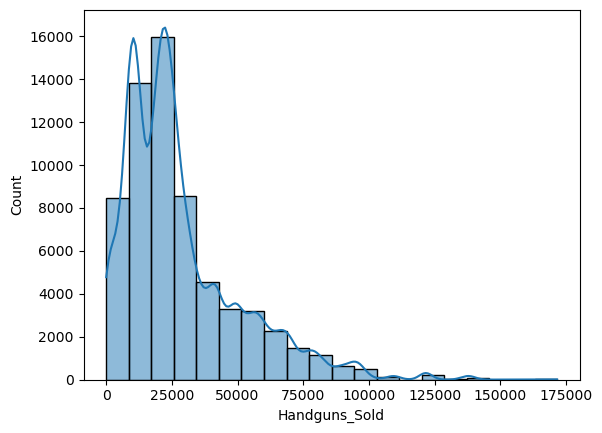

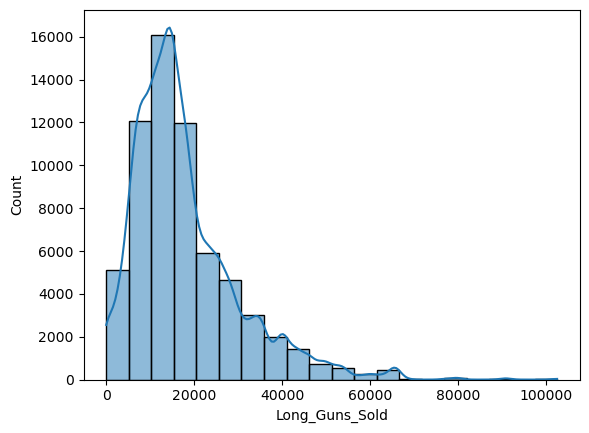

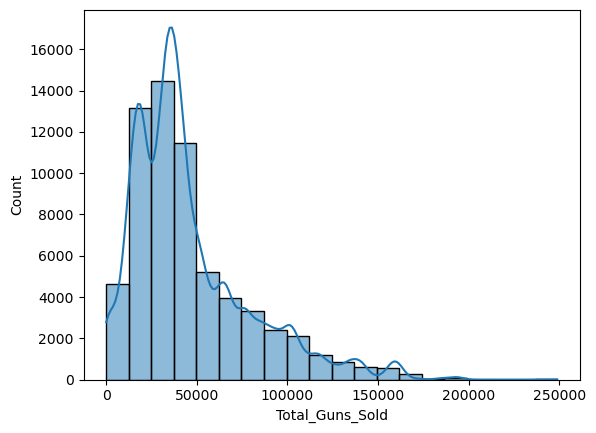

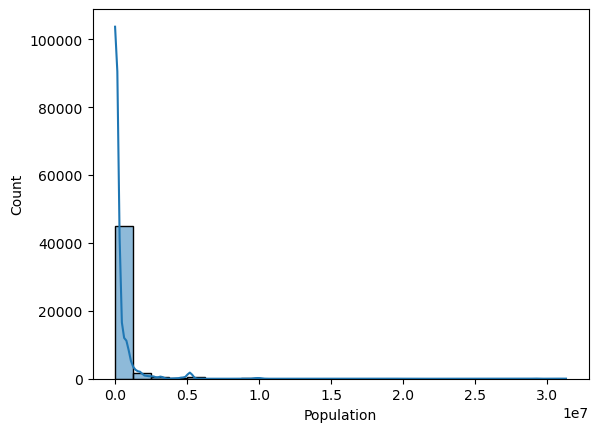

In [21]:
#Chcekcing histograms for missing values
sns.histplot(df['Handguns_Sold'], bins=20, kde=True)
plt.show()
sns.histplot(df['Long_Guns_Sold'], bins=20, kde=True) 
plt.show()
sns.histplot(df['Total_Guns_Sold'], bins=20, kde=True) 
plt.show()
sns.histplot(df['Population'], bins=25, kde=True) 
plt.show()

The missing values are likely due to data not being available--as deducted in the sourcing, wrangling, and cleaning stage of this project. The values on gun sales will be left as they are. Population needs to be inspected. 

In [23]:
#Inspecting 'Population'
df['Population'].value_counts()

Population
770383.0    300
34688.0     300
35626.0     210
367386.0    209
34804.0     180
           ... 
27766.0       1
178503.0      1
711530.0      1
13177.0       1
93439.0       1
Name: count, Length: 5656, dtype: int64

In [24]:
pd.set_option('display.max_rows', None)

In [25]:
df['Population'].value_counts(dropna=False)

Population
NaN           16465
34688.0         300
770383.0        300
35626.0         210
367386.0        209
34804.0         180
60557.0         150
765322.0        150
61075.0         150
65091.0         138
13218.0         133
35485.0         120
34820.0         120
1318766.0       120
143387.0        115
48089.0         115
48288.0         115
21402.0         114
1764866.0       112
5223386.0       111
20264.0         108
5145326.0       102
658539.0        100
767770.0        100
767785.0        100
1257891.0        96
5199582.0        93
27189.0          93
11541.0          92
46257.0          92
704350.0         92
129025.0         90
60018.0          90
5171007.0        87
940152.0         85
963829.0         85
937239.0         81
1757874.0        80
1760835.0        80
13213.0          76
13198.0          76
660507.0         75
659672.0         75
17236.0          74
13265.0          72
226074.0         72
227420.0         72
936012.0         72
56341.0          72
1275212.0

In [26]:
(df['Population'] == 0).sum()

0

In [27]:
#Changing NaN values in 'Population' to 0, given that 0 does not appear once in the column. 

#### IMPORTANT! NaNs on Population were changed to 0 because 0 does not appear in the frequency of values and will be used as a placeholder for NaN.

In [29]:
df['Population'] = df['Population'].fillna(0)

In [30]:
#Checking replacement
df['Population'].value_counts(dropna=False)

Population
0.0           16465
34688.0         300
770383.0        300
35626.0         210
367386.0        209
34804.0         180
60557.0         150
765322.0        150
61075.0         150
65091.0         138
13218.0         133
35485.0         120
34820.0         120
1318766.0       120
143387.0        115
48089.0         115
48288.0         115
21402.0         114
1764866.0       112
5223386.0       111
20264.0         108
5145326.0       102
658539.0        100
767770.0        100
767785.0        100
1257891.0        96
5199582.0        93
27189.0          93
11541.0          92
46257.0          92
704350.0         92
129025.0         90
60018.0          90
5171007.0        87
940152.0         85
963829.0         85
937239.0         81
1757874.0        80
1760835.0        80
13213.0          76
13198.0          76
660507.0         75
659672.0         75
17236.0          74
13265.0          72
226074.0         72
227420.0         72
936012.0         72
56341.0          72
1275212.0

In [31]:
pd.reset_option('display.max_rows')

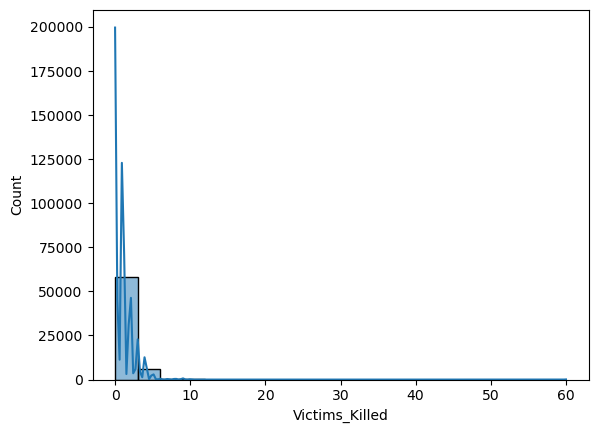

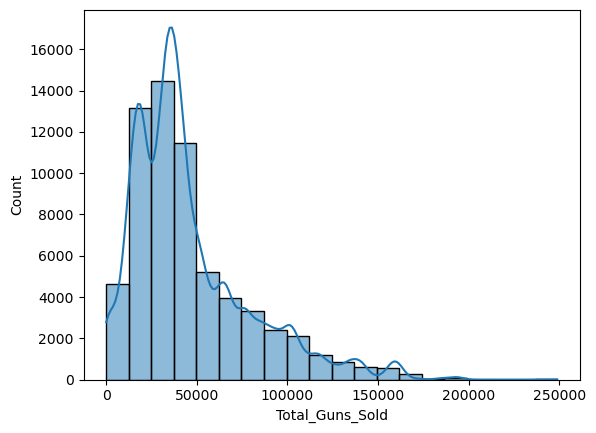

In [32]:
#Checking the frequencies of variable for clorplath map. 
sns.histplot(df['Victims_Killed'], bins=20, kde=True)
plt.show()
sns.histplot(df['Total_Guns_Sold'], bins=20, kde=True)
plt.show()

In [33]:
#Data is consistent with the checks in the cleaning and wrangling stages, as well as initial visualizations. 

#### 4. Cloropleth maps

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Incident_ID,Date,Year,Month,State,City,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested,Year_Month_State,Handguns_Sold,Long_Guns_Sold,Total_Guns_Sold,State_ID,State_y,County,Lat,Long,Population,Shootings_County,Shootings_State,Total_Harmed_Victims,Any_Suspect_Arrested
0,0,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,NaN,NaN,NaN,TN,Tennessee,Shelby,35.1087,-89.9663,0.0,3,30,6,No
1,1,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,NaN,NaN,NaN,FL,Florida,Manatee,27.5435,-82.5608,0.0,3,30,6,No
2,2,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,NaN,NaN,NaN,TX,Texas,Hall,34.7268,-100.5416,0.0,3,30,6,No
3,3,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,NaN,NaN,NaN,MO,Missouri,Scotland,40.4613,-92.1704,0.0,3,30,6,No
4,4,0,3181158,2025-04-09,2025,4,Tennessee,Memphis,1,5,0,0,0,2025-4-Tennessee,NaN,NaN,NaN,MI,Michigan,Macomb,42.8956,-82.7689,0.0,3,30,6,No


In [37]:
# Creating data frame with states and values for 'VICTIMS KILLED PER MASS SHOOTING EVENT'

data_to_plot = df[['State','Shootings_State']]
data_to_plot.head()

,State,Shootings_State
0,Tennessee,30
1,Tennessee,30
2,Tennessee,30
3,Tennessee,30
4,Tennessee,30


In [38]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = us_geo, 
    data = data_to_plot,
    columns = ['State', 'Shootings_State'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [39]:
# Creating data frame with states and values 'TOTAL GUNS SOLD IN THE US'

data_to_plot = df[['State','Total_Guns_Sold']]
data_to_plot.head()

,State,Total_Guns_Sold
0,Tennessee,NaN
1,Tennessee,NaN
2,Tennessee,NaN
3,Tennessee,NaN
4,Tennessee,NaN


In [40]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = us_geo, 
    data = data_to_plot,
    columns = ['State', 'Total_Guns_Sold'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

#### Interpretation

Once aggregating the total mass shooting events per state and comparing it to the total number of guns sold, we can see a more detectable relationship. 

In [43]:
#Checking correlations
#Creating subset
sub = df[['Suspects_Arrested', 'Handguns_Sold', 'Long_Guns_Sold', 
          'Total_Guns_Sold', 'Population', 'Shootings_County', 'Shootings_State', 'Total_Harmed_Victims'
         ]]

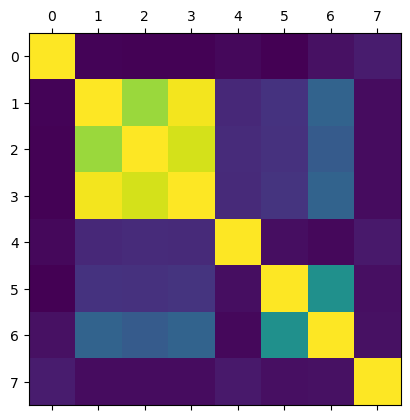

In [44]:
plt.matshow(sub.corr())
plt.show()

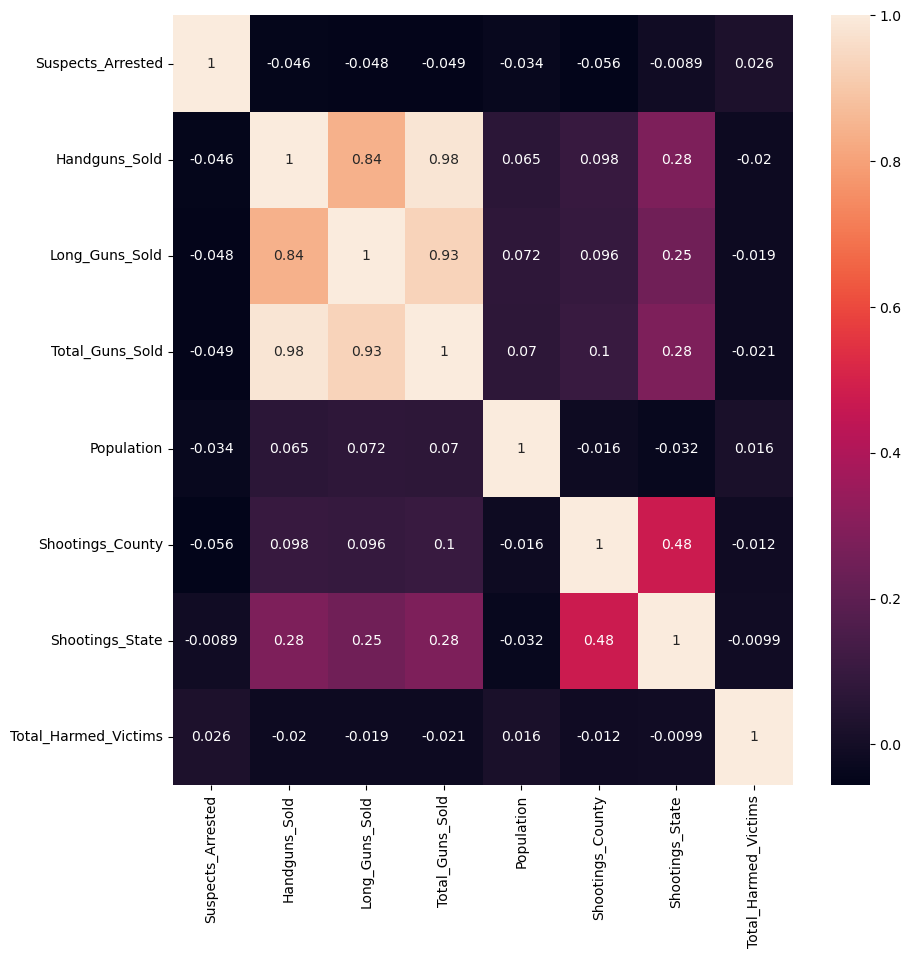

In [45]:
# Subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Correlation heatmap in seaborn.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
plt.show()

#### Interpretation

Corroborating with a correlation heatmap, we see that there is a very negligible correlation between the number of guns sold and the number of shootings. The correlations that are indeed appreciated have to do with the kind of variables they are. For example, the strong correlation between the types of guns sold likely indicates that there's a probabilty that when a person buys a handgun, they likely buy a long gun as well. The same happens with state and county, they are correlated because they belong to the same place. 


The lack of correlation between the number of shootings and number of guns sold, despite there being an intuitevely appreciated geographic distribution on the maps shows that if there is a relationship between guns sold and number of shootings, it is indeed spatial: It is related to external factors that are not considered in this dataset. 

This observation confirms the suspicions from the previous exercise and confirms the necessity of the questions then posed. 

In [50]:
df.to_csv(os.path.join(path, '02_Data', 'Prepared', '130425_mass_shoot_merged_derived.csv'))